In [68]:
import pandas as pd
import numpy as np
import sklearn as sl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('smoking.csv')
data = data.drop(['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries', 'tartar'], axis=1)
data.head()

,gender,age,height(cm),weight(kg),waist(cm),fasting blood sugar,Cholesterol,triglyceride,smoking
0,F,40,155,60,81.3,94.0,215.0,82.0,0
1,F,40,160,60,81.0,130.0,192.0,115.0,0
2,M,55,170,60,80.0,89.0,242.0,182.0,1
3,M,40,165,70,88.0,96.0,322.0,254.0,0
4,F,40,155,60,86.0,80.0,184.0,74.0,0


In [38]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col]).codes

data.dtypes

gender                    int8
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
smoking                  int64
dtype: object

In [46]:
X = data.drop(columns='smoking')
Y = data.smoking
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [44]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(41769, 8) (13923, 8)
(41769,) (13923,)


In [60]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_pred)
print('Decision Tree model accuracy:', tree_accuracy)

Decision Tree model accuracy: 0.7675963610246589


In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
print('KNN model accuracy:', knn_accuracy)

KNN model accuracy: 0.7046325113717979


In [62]:
tree_params = {'max_depth': range(1, 11)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(X_train, Y_train)
best_tree = tree_grid.best_estimator_
best_tree_accuracy = accuracy_score(Y_test, best_tree.predict(X_test))
print('Desision Tree model best parameters:', tree_grid.best_params_)
print('Best Desision Tree model accuracy:', best_tree_accuracy)

Desision Tree model best parameters: {'max_depth': 7}
Best Desision Tree model accuracy: 0.733720373473785


In [63]:
knn_params = {'n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, Y_train)
best_knn = knn_grid.best_estimator_
accuracy_best_knn = accuracy_score(Y_test, best_knn.predict(X_test))
print("KNN model best parameters:", knn_grid.best_params_)
print("Best KNN model accuracy:", accuracy_best_knn)

KNN model best parameters: {'n_neighbors': 1}
Best KNN model accuracy: 0.745690687096002


In [66]:
tree_confusion = confusion_matrix(Y_test, tree_pred)
knn_confusion = confusion_matrix(Y_test, knn_pred)
print('Decision Tree model confusion matrix:');
print(tree_confusion)
print('\nKNN model confusion matrix:');
print(knn_confusion)

Decision Tree model confusion matrix:
[[8565 1966]
 [1917 4260]]

KNN model confusion matrix:
[[8258 2273]
 [2662 3515]]


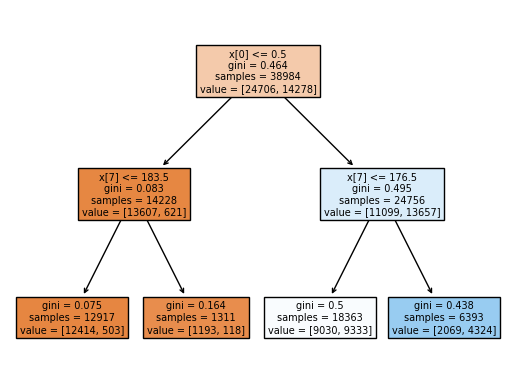

In [77]:
tree_viz = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_viz.fit(X_train, Y_train)
plot_tree(tree_viz, filled=True)
plt.savefig('tree_visualization.png')

In [ ]:
# строится дерево, в узлах - характеристические параметры и значение, в левом поддереве узлы с значением данного параметра меньше данного значения,
# в правом - наоборот. В листьях хранятся значения y, которые надо предсказывать. Данное дерево может использоваться для предсказания неизвестных
# данных, для этого нужно просто пройтись по дереву в соответствии с параметрами неизвестной строки, и в листе, в котором закончился обход, будет
# находиться предсказание

In [ ]:
# Сформулируйте задачу классификации?
    # определение принадлежности значений к заранее определённым классам
# Что означает обучение с учителем?
    # когда модель учится на данных с правильными ответами
# Зачем разделять обучающую выборку?
    # для оценки точности модели
# Что означает переобученная модель? Как с этим бороться?
    # модель, на которую слишком сильно влияют обучающие данные, из-за чего падает точность на тестовых данных
    # увеличение объёма обучающих данных
    # упрощение модели (например, уменьшение глубины дерева решений)
# Что означает обобщающая способность моделей машинного обучения?
    # способность правильно прогнозировать и обобщать знания на новые данные
# Объясните значения в матрице ошибок, как она рассчитывается?
    # true-positive false-negative (1)
    # false-positive (2) true-negative
# Что показывают accuracy, precision и recall?
    # Accuracy (TP + TN) / (TP + TN + FP + FN)
    # Precision TP / (TP + FP)
    # Recall TP / (TP + FN)